# Practice Lab - Advice for Applying Machine Learning
In this lab, you will explore techniques to evaluate and improve your machine learning models.

# Outline
- [ 1 - Packages ](#1)
- [ 2 - Evaluating a Learning Algorithm (Polynomial Regression)](#2)
  - [ 2.1 Splitting your data set](#2.1)
  - [ 2.2 Error calculation for model evaluation, linear regression](#2.2)
    - [ Exercise 1](#ex01)
  - [ 2.3 Compare performance on training and test data](#2.3)
- [ 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> ](#3)
  - [ 3.1 Plot Train, Cross-Validation, Test](#3.1)
  - [ 3.2 Finding the optimal degree](#3.2)
  - [ 3.3 Tuning Regularization.](#3.3)
  - [ 3.4 Getting more data: Increasing Training Set Size (m)](#3.4)
- [ 4 - Evaluating a Learning Algorithm (Neural Network)](#4)
  - [ 4.1 Data Set](#4.1)
  - [ 4.2 Evaluating categorical model by calculating classification error](#4.2)
    - [ Exercise 2](#ex02)
- [ 5 - Model Complexity](#5)
  - [ Exercise 3](#ex03)
  - [ 5.1 Simple model](#5.1)
    - [ Exercise 4](#ex04)
- [ 6 - Regularization](#6)
  - [ Exercise 5](#ex05)
- [ 7 - Iterate to find optimal regularization value](#7)
  - [ 7.1 Test](#7.1)


<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [scikitlearn](https://scikit-learn.org/stable/) is a basic library for data mining
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from public_tests_a1 import * 

tf.keras.backend.set_floatx('float64')
from assigment_utils import *

tf.autograph.set_verbosity(0)

<a name="2"></a>
## 2 - Evaluating a Learning Algorithm (Polynomial Regression)

<img align="Right" src="./images/C2_W3_TrainingVsNew.png"  style=" width:350px; padding: 10px 20px ; "> Let's say you have created a machine learning model and you find it *fits* your training data very well. You're done? Not quite. The goal of creating the model was to be able to predict values for <span style="color:blue">*new* </span> examples. 

How can you test your model's performance on new data before deploying it?   
The answer has two parts:
* Split your original data set into "Training" and "Test" sets. 
    * Use the training data to fit the parameters of the model
    * Use the test data to evaluate the model on *new* data
* Develop an error function to evaluate your model.

<a name="2.1"></a>
### 2.1 Splitting your data set
Lectures advised reserving 20-40% of your data set for testing. Let's use an `sklearn` function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to perform the split. Double-check the shapes after running the following cell.

In [4]:
# Generate some data
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (18,) y.shape (18,)
X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


#### 2.1.1 Plot Train, Test sets
You can see below the data points that will be part of training (in red) are intermixed with those that the model is not trained on (test). This particular data set is a quadratic function with noise added. The "ideal" curve is shown for reference.

<IPython.core.display.Javascript object>


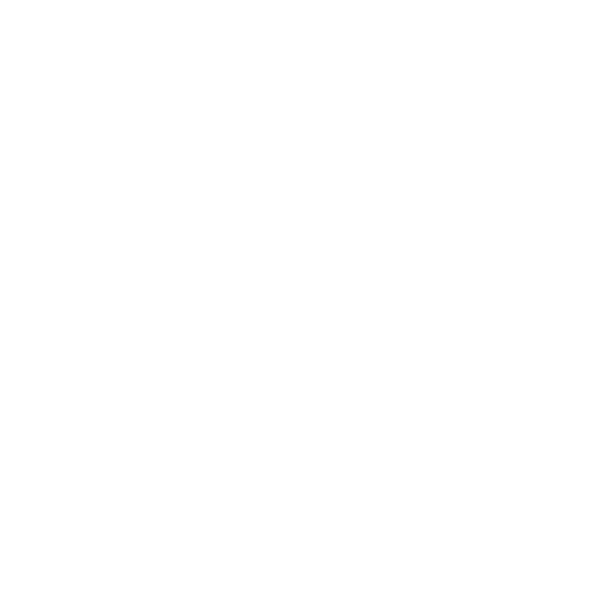

In [5]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="2.2"></a>
### 2.2 Error calculation for model evaluation, linear regression
When *evaluating* a linear regression model, you average the squared error difference of the predicted values and the target values.

$$ J_\text{test}(\mathbf{w},b) = 
            \frac{1}{2m_\text{test}}\sum_{i=0}^{m_\text{test}-1} ( f_{\mathbf{w},b}(\mathbf{x}^{(i)}_\text{test}) - y^{(i)}_\text{test} )^2 
            \tag{1}
$$

<a name="ex01"></a>
### Exercise 1

Below, create a function to evaluate the error on a data set for a linear regression model.

In [8]:
# UNQ_C1
# GRADED CELL: eval_mse
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
    ### START CODE HERE ### 
        err += np.power(yhat[i]-y[i],2)
    err /= 2*m
    ### END CODE HERE ### 
    
    return(err)

In [9]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
eval_mse(y_hat, y_tmp)

# BEGIN UNIT TEST
test_eval_mse(eval_mse)   
# END UNIT TEST

 All tests passed.


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>

    
```python
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
        err_i  = ( (yhat[i] - y[i])**2 ) 
        err   += err_i                                                                
    err = err / (2*m)                    
    return(err)
``` 

<a name="2.3"></a>
### 2.3 Compare performance on training and test data
Let's build a high degree polynomial model to minimize training error. This will use the linear_regression functions from `sklearn`. The code is in the imported utility file if you would like to see the details. The steps below are:
* create and fit the model. ('fit' is another name for training or running gradient descent).
* compute the error on the training data.
* compute the error on the test data.

In [10]:
# create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

The computed error on the training set is substantially less than that of the test set. 

In [11]:
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 58.01, test err 171215.01


The following plot shows why this is. The model fits the training data very well. To do so, it has created a complex function. The test data was not part of the training and the model does a poor job of predicting on this data.  
This model would be described as 1) is overfitting, 2) has high variance 3) 'generalizes' poorly.

<IPython.core.display.Javascript object>


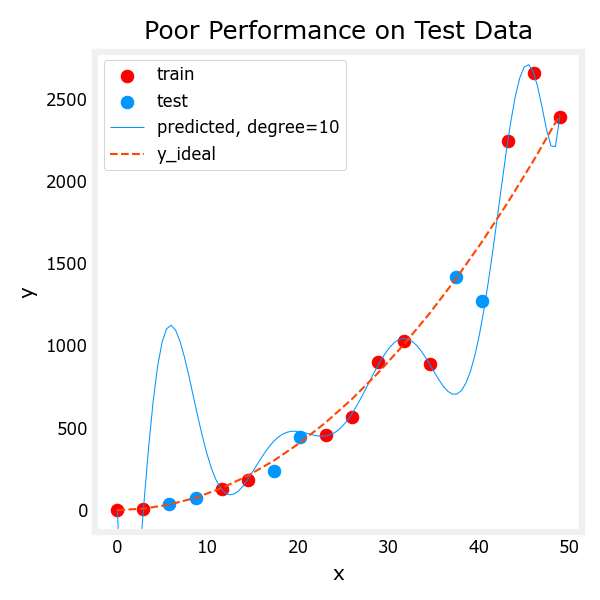

In [12]:
# plot predictions over data range 
x = np.linspace(0,int(X.max()),100)  # predict values for plot
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

The test set error shows this model will not work well on new data. If you use the test error to guide improvements in the model, then the model will perform well on the test data... but the test data was meant to represent *new* data.
You need yet another set of data to test new data performance.

The proposal made during lecture is to separate data into three groups. The distribution of training, cross-validation and test sets shown in the below table is a typical distribution, but can be varied depending on the amount of data available.

| data             | % of total | Description |
|------------------|:----------:|:---------|
| training         | 60         | Data used to tune model parameters $w$ and $b$ in training or fitting |
| cross-validation | 20         | Data used to tune other model parameters like degree of polynomial, regularization or the architecture of a neural network.|
| test             | 20         | Data used to test the model after tuning to gauge performance on new data |


Let's generate three data sets below. We'll once again use `train_test_split` from `sklearn` but will call it twice to get three splits:

In [13]:
# Generate  data
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


<a name="3"></a>
## 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> 
 Above, it was clear the degree of the polynomial model was too high. How can you choose a good value? It turns out, as shown in the diagram, the training and cross-validation performance can provide guidance. By trying a range of degree values, the training and cross-validation performance can be evaluated. As the degree becomes too large, the cross-validation performance will start to degrade relative to the training performance. Let's try this on our example.

<a name="3.1"></a>
### 3.1 Plot Train, Cross-Validation, Test
You can see below the datapoints that will be part of training (in red) are intermixed with those that the model is not trained on (test and cv).

<IPython.core.display.Javascript object>


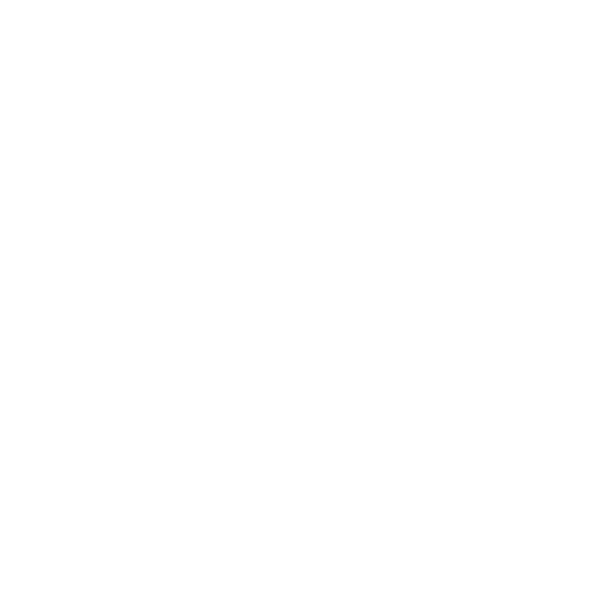

In [14]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_cv, y_cv,       color = dlc["dlorange"], label="cv")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="3.2"></a>
### 3.2 Finding the optimal degree
In previous labs, you found that you could create a model capable of fitting complex curves by utilizing a polynomial (See Course1, Week2 Feature Engineering and Polynomial Regression Lab).  Further, you demonstrated that by increasing the *degree* of the polynomial, you could *create* overfitting. (See Course 1, Week3, Over-Fitting Lab). Let's use that knowledge here to test our ability to tell the difference between over-fitting and under-fitting.

Let's train the model repeatedly, increasing the degree of the polynomial each iteration. Here, we're going to use the [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) linear regression model for speed and simplicity.

In [15]:
max_degree = 9
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(X.max()),100)  
y_pred = np.zeros((100,max_degree))  #columns are lines to plot

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:,degree] = lmodel.predict(x)
    
optimal_degree = np.argmin(err_cv)+1

<font size="4">Let's plot the result:</font>

<IPython.core.display.Javascript object>


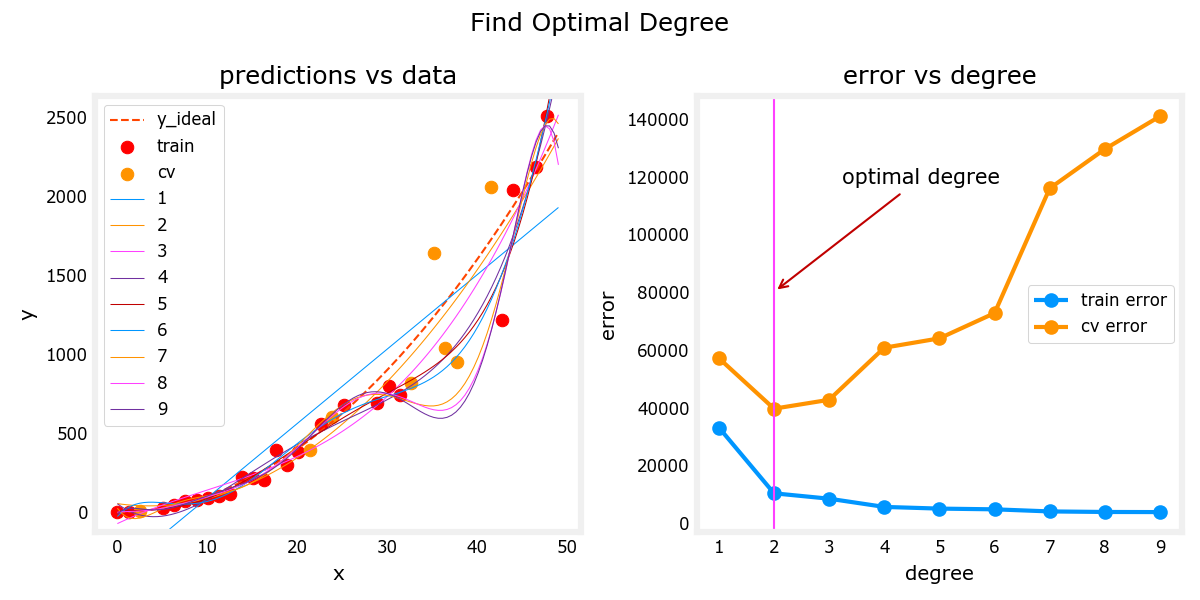

In [16]:
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)

The plot above demonstrates that separating data into two groups, data the model is trained on and data the model has not been trained on, can be used to determine if the model is underfitting or overfitting. In our example, we created a variety of models varying from underfitting to overfitting by increasing the degree of the polynomial used. 
- On the left plot, the solid lines represent the predictions from these models. A polynomial model with degree 1 produces a straight line that intersects very few data points, while the maximum degree hews very closely to every data point. 
- on the right:
    - the error on the trained data (blue) decreases as the model complexity increases as expected
    - the error of the cross-validation data decreases initially as the model starts to conform to the data, but then increases as the model starts to over-fit on the training data (fails to *generalize*).     
    
It's worth noting that the curves in these examples as not as smooth as one might draw for a lecture. It's clear the specific data points assigned to each group can change your results significantly. The general trend is what is important.

<a name="3.3"></a>
### 3.3 Tuning Regularization.
In previous labs, you have utilized *regularization* to reduce overfitting. Similar to degree, one can use the same methodology to tune the regularization parameter lambda ($\lambda$).

Let's demonstrate this by starting with a high degree polynomial and varying the regularization parameter.

In [17]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)    
err_cv = np.zeros(num_steps)       
x = np.linspace(0,int(X.max()),100) 
y_pred = np.zeros((100,num_steps))  #columns are lines to plot

for i in range(num_steps):
    lambda_= lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)
    
optimal_reg_idx = np.argmin(err_cv) 

<IPython.core.display.Javascript object>


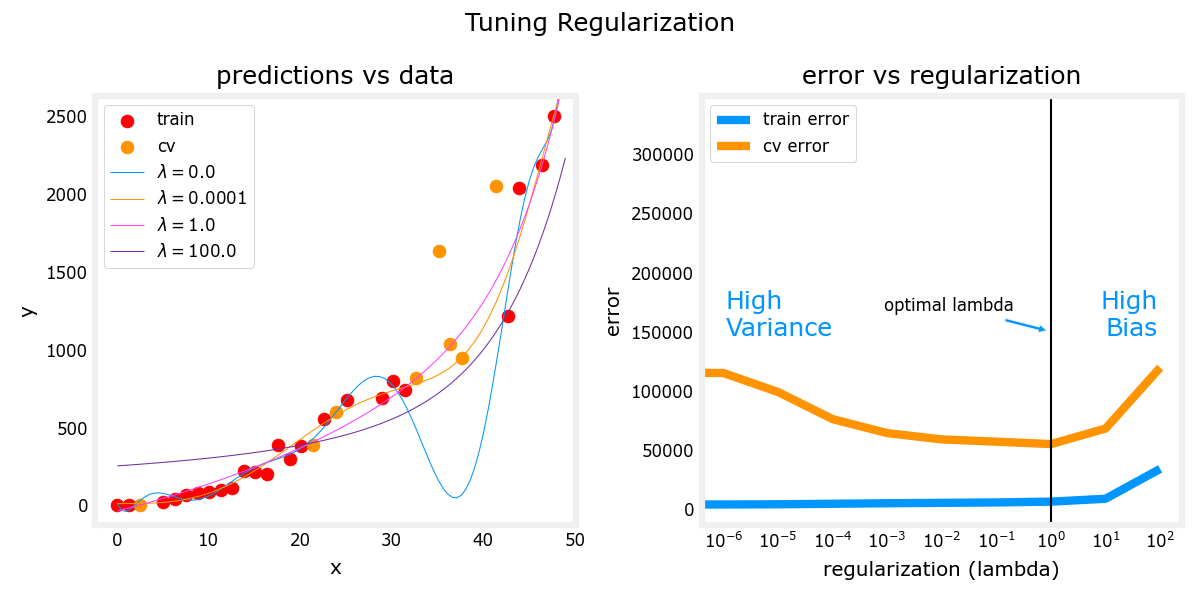

In [18]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

Above, the plots show that as regularization increases, the model moves from a high variance (overfitting) model to a high bias (underfitting) model. The vertical line in the right plot shows the optimal value of lambda. In this example, the polynomial degree was set to 10. 

<a name="3.4"></a>
### 3.4 Getting more data: Increasing Training Set Size (m)
When a model is overfitting (high variance), collecting additional data can improve performance. Let's try that here.

In [19]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

<IPython.core.display.Javascript object>

The above plots show that when a model has high variance and is overfitting, adding more examples improves performance. Note the curves on the left plot. The final curve with the highest value of $m$ is a smooth curve that is in the center of the data. On the right, as the number of examples increases, the performance of the training set and cross-validation set converge to similar values. Note that the curves are not as smooth as one might see in a lecture. That is to be expected. The trend remains clear: more data improves generalization. 

> Note that adding more examples when the model has high bias (underfitting) does not improve performance.


<a name="4"></a>
## 4 - Evaluating a Learning Algorithm (Neural Network)
Above, you tuned aspects of a polynomial regression model. Here, you will work with a neural network model. Let's start by creating a classification data set. 

<a name="4.1"></a>
### 4.1 Data Set
Run the cell below to generate a data set and split it into training, cross-validation (CV) and test sets. In this example, we're increasing the percentage of cross-validation data points for emphasis.  

In [20]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs()

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


<IPython.core.display.Javascript object>


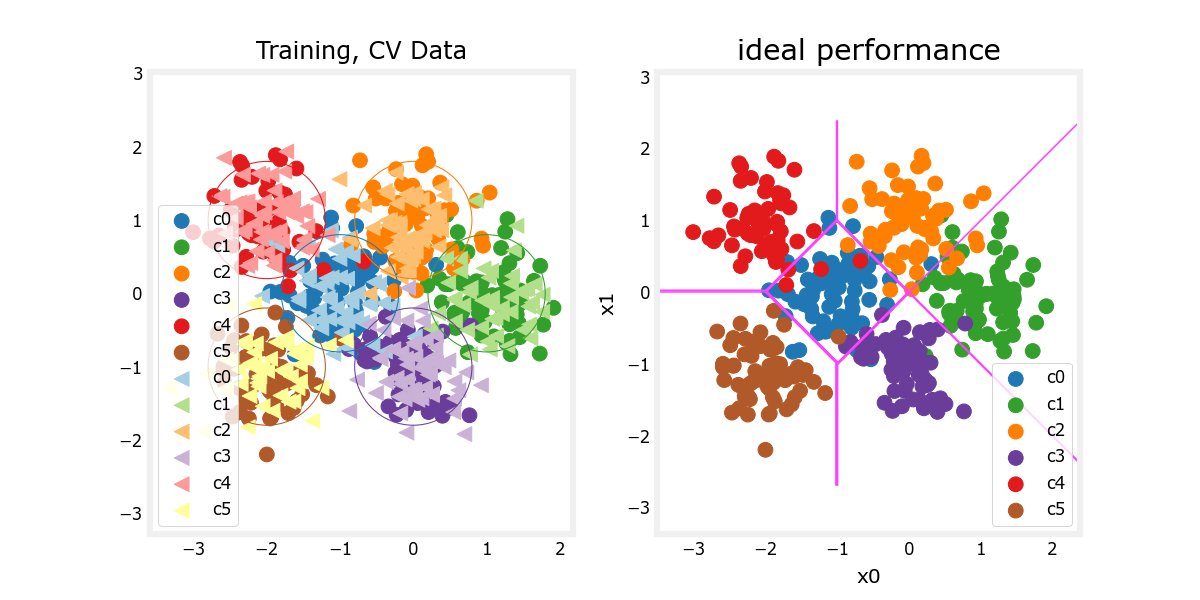

In [21]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

Above, you can see the data on the left. There are six clusters identified by color. Both training points (dots) and cross-validataion points (triangles) are shown. The interesting points are those that fall in ambiguous locations where either cluster might consider them members. What would you expect a neural network model to do? What would be an example of overfitting? underfitting?  
On the right is an example of an 'ideal' model, or a model one might create knowing the source of the data. The lines represent 'equal distance' boundaries where the distance between center points is equal. It's worth noting that this model would "misclassify" roughly 8% of the total data set.

<a name="4.2"></a>
### 4.2 Evaluating categorical model by calculating classification error
The evaluation function for categorical models used here is simply the fraction of incorrect predictions:  
$$ J_{cv} =\frac{1}{m}\sum_{i=0}^{m-1} 
\begin{cases}
    1, & \text{if $\hat{y}^{(i)} \neq y^{(i)}$}\\
    0, & \text{otherwise}
\end{cases}
$$

<a name="ex02"></a>
### Exercise 2

Below, complete the routine to calculate classification error. Note, in this lab, target values are the index of the category and are not [one-hot encoded](https://en.wikipedia.org/wiki/One-hot).

In [34]:
# UNQ_C2
# GRADED CELL: eval_cat_err
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(m):
    ### START CODE HERE ### 
        if y[i]!=yhat[i]:
            incorrect+=1
    cerr = incorrect/m
    ### END CODE HERE ### 
    return(cerr)

In [35]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )

# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST
# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250
 All tests passed.
 All tests passed.


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
```python
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(m):
        if yhat[i] != y[i]:    # @REPLACE
            incorrect += 1     # @REPLACE
    cerr = incorrect/m         # @REPLACE
    return(cerr)                                    
``` 

<a name="5"></a>
## 5 - Model Complexity
Below, you will build two models. A complex model and a simple model. You will evaluate the models to determine if they are likely to overfit or underfit.

###  5.1 Complex model

<a name="ex03"></a>
### Exercise 3
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation
* Dense layer with 40 units, relu activation
* Dense layer with 6 units and a linear activation (not softmax)  
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [47]:
# UNQ_C3
# GRADED CELL: model
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.random.set_seed(1234)
model = Sequential(
    [
        ### START CODE HERE ### 
        Dense(units=120,activation=relu,name="L1"),
        Dense(units=40,activation=relu,name="L2"),
        Dense(classes,activation=linear,name="L3"),
        ### END CODE HERE ### 

    ], name="Complex"
)
model.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
    ### END CODE HERE ### 
)

In [48]:
# BEGIN UNIT TEST
model.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - loss: 1.3116
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.4067
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.3294
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.2529
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2280 
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2150 
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 0.2083
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2044 
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1990 
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 0.1972
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 83us/step - loss: 0.1993
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 0.1927
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 0.1943
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step - loss: 0.1928
Epoch 15/1000
13/13 ━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 0.1309
Epoch 80/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1295 
Epoch 81/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 0.1320
Epoch 82/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 0.1380
Epoch 83/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1330 
Epoch 84/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 0.1497
Epoch 85/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 0.1401
Epoch 86/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 0.1358
Epoch 87/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.1397
Epoch 88/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 0.1288
Epoch 89/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.1347
Epoch 90/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.1278
Epoch 91/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.1319
Epoch 92/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 0.1226
Epoch 93/1000
13/13 ━━━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 0.1539
Epoch 158/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 0.0865
Epoch 159/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.0790
Epoch 160/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.0940
Epoch 161/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0943 
Epoch 162/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 0.0920
Epoch 163/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - loss: 0.1137
Epoch 164/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 0.1057
Epoch 165/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.1081
Epoch 166/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0887 
Epoch 167/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1124 
Epoch 168/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 0.1208
Epoch 169/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.1099
Epoch 170/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 0.0994
Epoch 171/1000
13/13 ━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.1001
Epoch 236/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0855 
Epoch 237/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 0.0759
Epoch 238/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.0742
Epoch 239/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.0755
Epoch 240/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 0.0781
Epoch 241/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 0.0785
Epoch 242/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 0.0918
Epoch 243/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 0.0787
Epoch 244/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 0.0717
Epoch 245/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 0.0716
Epoch 246/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 0.0807
Epoch 247/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.0662
Epoch 248/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 0.0656
Epoch 249/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.0567
Epoch 314/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 0.0768
Epoch 315/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.0561
Epoch 316/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 0.0728
Epoch 317/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 0.0631
Epoch 318/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.0641
Epoch 319/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 0.0543
Epoch 320/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 0.0704
Epoch 321/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 0.0569
Epoch 322/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 0.0743
Epoch 323/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.0536
Epoch 324/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 0.0613
Epoch 325/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.0520
Epoch 326/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 0.0539
Epoch 327/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 0.1093
Epoch 392/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.0990
Epoch 393/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 0.1005
Epoch 394/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 0.0829
Epoch 395/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 0.0803
Epoch 396/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.0769
Epoch 397/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 0.1036
Epoch 398/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.0870
Epoch 399/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 0.0870
Epoch 400/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 0.0890
Epoch 401/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.0836
Epoch 402/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 0.0673
Epoch 403/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 0.0568
Epoch 404/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 0.0533
Epoch 405/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 0.0415
Epoch 470/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 0.0517
Epoch 471/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 0.0401
Epoch 472/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 0.0457
Epoch 473/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.0412
Epoch 474/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 0.0522
Epoch 475/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 0.0773
Epoch 476/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.0794
Epoch 477/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 0.0494
Epoch 478/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.0469
Epoch 479/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 0.0640
Epoch 480/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 0.0651
Epoch 481/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 0.0422
Epoch 482/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 0.0389
Epoch 483/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.0316
Epoch 548/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 0.0300
Epoch 549/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 0.0315
Epoch 550/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 0.0292
Epoch 551/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.0298
Epoch 552/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0496 
Epoch 553/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 0.0359
Epoch 554/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0408 
Epoch 555/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 0.0340
Epoch 556/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.0294
Epoch 557/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 0.0417
Epoch 558/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.0390
Epoch 559/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 0.0372
Epoch 560/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0322 
Epoch 561/1000
13/13 ━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 0.0443
Epoch 626/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 0.0413
Epoch 627/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 0.0723
Epoch 628/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 0.0415
Epoch 629/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 0.0599
Epoch 630/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.0338
Epoch 631/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 0.0418
Epoch 632/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.0840
Epoch 633/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 0.0371
Epoch 634/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.0490
Epoch 635/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 0.0329
Epoch 636/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 0.0406
Epoch 637/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 0.0354
Epoch 638/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 0.0372
Epoch 639/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 0.0777
Epoch 704/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 0.1639
Epoch 705/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.0926
Epoch 706/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 0.1193
Epoch 707/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.0993
Epoch 708/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 0.0768
Epoch 709/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.0623
Epoch 710/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.0558
Epoch 711/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 0.1040
Epoch 712/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 0.0589
Epoch 713/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.0556
Epoch 714/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.0727
Epoch 715/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.0747
Epoch 716/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.0560
Epoch 717/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.0520
Epoch 782/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.0478
Epoch 783/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 0.0454
Epoch 784/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 0.0354
Epoch 785/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 0.0496
Epoch 786/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.0434
Epoch 787/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.0687
Epoch 788/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 0.0448
Epoch 789/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.0904
Epoch 790/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 0.0890
Epoch 791/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 0.0817
Epoch 792/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 0.1090
Epoch 793/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.0708
Epoch 794/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 0.0533
Epoch 795/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.0417
Epoch 860/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 0.0320
Epoch 861/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.0484
Epoch 862/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 0.0414
Epoch 863/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.0736
Epoch 864/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.1241
Epoch 865/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 0.1819
Epoch 866/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 0.1232
Epoch 867/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 0.1352
Epoch 868/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.1750
Epoch 869/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.1264
Epoch 870/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 0.1032
Epoch 871/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 0.1165
Epoch 872/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 0.0506
Epoch 873/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.0290
Epoch 938/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 0.0250
Epoch 939/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.0200
Epoch 940/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.0325
Epoch 941/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 0.0209
Epoch 942/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.0250
Epoch 943/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 0.0195
Epoch 944/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.0261
Epoch 945/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 0.0186
Epoch 946/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.0210
Epoch 947/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 0.0237
Epoch 948/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 0.0212
Epoch 949/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 0.0305
Epoch 950/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 0.0309   
Epoch 951/1000
13/

In [50]:
# BEGIN UNIT TEST
model.summary()

model_test(model, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "Complex"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 120)                 │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L2 (Dense)                           │ (None, 40)                  │           4,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L3 (Dense)                           │ (None, 6)                   │             246 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,340 (127.66 KB)

 Trainable params: 5,446 (42.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,894 (85.11 KB)

ValueError: The layer Complex has never been called and thus has no defined input.

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Complex"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(120, activation = 'relu', name = "L1"),      
        Dense(40, activation = 'relu', name = "L2"),         
        Dense(classes, activation = 'linear', name = "L3")  
    ], name="Complex"
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),          
    optimizer=tf.keras.optimizers.Adam(0.01),   
)

model.fit(
    X_train,y_train,
    epochs=1000
)                                  
``` 

<IPython.core.display.Javascript object>


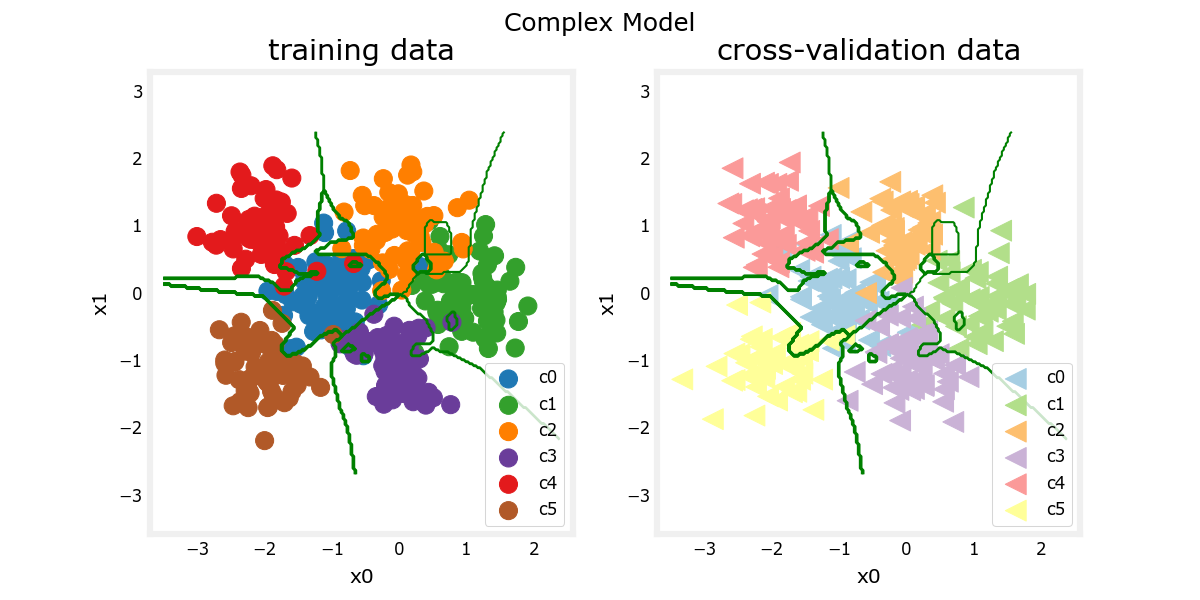

1082/1082 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step


In [51]:
#make a model for plotting routines to call
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

This model has worked very hard to capture outliers of each category. As a result, it has miscategorized some of the cross-validation data. Let's calculate the classification error.

In [52]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
categorization error, training, complex model: 0.010
categorization error, cv,       complex model: 0.097


<a name="5.1"></a>
### 5.1 Simple model
Now, let's try a simple model

<a name="ex04"></a>
### Exercise 4

Below, compose a two-layer model:
* Dense layer with 6 units, relu activation
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [53]:
# UNQ_C4
# GRADED CELL: model_s

tf.random.set_seed(1234)
model_s = Sequential(
    [
        ### START CODE HERE ### 
      Dense(units=6,activation=relu,name="L1"),
      Dense(units=6,activation=linear,name="L2"),
        ### END CODE HERE ### 
    ], name = "Simple"
)
model_s.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
    ### START CODE HERE ### 
)


In [54]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# BEGIN UNIT TEST
model_s.fit(
    X_train,y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7693  
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 1.5083
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 1.3126
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 1.1459
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 0.9931
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 0.8355
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 0.6875
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.5671
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4777 
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.4138
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 0.3682
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 0.3356
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 0.3120
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 0.2934
Epoch 15/1000
13/13 ━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.1829
Epoch 80/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 0.1829
Epoch 81/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.1828
Epoch 82/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 0.1827
Epoch 83/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 0.1827
Epoch 84/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 0.1826
Epoch 85/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 0.1825
Epoch 86/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 0.1824
Epoch 87/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 0.1823
Epoch 88/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 0.1823
Epoch 89/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 0.1823
Epoch 90/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 0.1822
Epoch 91/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 0.1820
Epoch 92/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 0.1819
Epoch 93/1000
13/13 ━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 0.1795
Epoch 158/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 0.1795
Epoch 159/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 0.1796
Epoch 160/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 0.1796
Epoch 161/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 0.1796
Epoch 162/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.1794
Epoch 163/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - loss: 0.1794
Epoch 164/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 0.1795
Epoch 165/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.1795
Epoch 166/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 0.1793
Epoch 167/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.1792
Epoch 168/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 0.1793
Epoch 169/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 0.1793
Epoch 170/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.1792
Epoch 171/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 0.1778
Epoch 236/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1779 
Epoch 237/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 0.1777
Epoch 238/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.1779
Epoch 239/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 0.1777
Epoch 240/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 0.1777
Epoch 241/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 0.1778
Epoch 242/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 0.1778
Epoch 243/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 0.1779
Epoch 244/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 0.1776
Epoch 245/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 0.1777
Epoch 246/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.1776
Epoch 247/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 0.1776
Epoch 248/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - loss: 0.1776
Epoch 249/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 0.1767
Epoch 314/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 0.1768
Epoch 315/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 0.1766
Epoch 316/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 0.1766
Epoch 317/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 0.1767
Epoch 318/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 0.1768
Epoch 319/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 0.1767
Epoch 320/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 0.1767
Epoch 321/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.1767
Epoch 322/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 0.1765
Epoch 323/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 0.1766
Epoch 324/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 0.1769
Epoch 325/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 0.1765
Epoch 326/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 0.1767
Epoch 327/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.1759
Epoch 392/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 0.1761
Epoch 393/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 0.1764
Epoch 394/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 0.1760
Epoch 395/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 0.1759
Epoch 396/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 0.1760
Epoch 397/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 0.1759
Epoch 398/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.1759
Epoch 399/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 0.1760
Epoch 400/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.1760
Epoch 401/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.1759
Epoch 402/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 0.1761
Epoch 403/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 0.1760
Epoch 404/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.1759
Epoch 405/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 0.1754
Epoch 470/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 0.1755
Epoch 471/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.1754
Epoch 472/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.1753
Epoch 473/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 0.1753
Epoch 474/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 0.1753
Epoch 475/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 0.1753
Epoch 476/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 0.1755
Epoch 477/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 0.1753
Epoch 478/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 0.1751
Epoch 479/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.1753
Epoch 480/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 0.1751
Epoch 481/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 0.1754
Epoch 482/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.1756
Epoch 483/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 0.1748
Epoch 548/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1747 
Epoch 549/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 0.1745
Epoch 550/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.1747
Epoch 551/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.1747
Epoch 552/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 0.1747
Epoch 553/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 0.1748
Epoch 554/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 0.1748
Epoch 555/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 0.1747
Epoch 556/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 0.1748
Epoch 557/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.1746
Epoch 558/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 0.1745
Epoch 559/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 0.1746
Epoch 560/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 0.1747
Epoch 561/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.1743
Epoch 626/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 0.1746
Epoch 627/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 0.1746
Epoch 628/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 0.1744
Epoch 629/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 0.1745
Epoch 630/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 0.1746
Epoch 631/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 0.1743
Epoch 632/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 0.1745
Epoch 633/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 0.1745
Epoch 634/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 0.1745
Epoch 635/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - loss: 0.1744
Epoch 636/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 0.1744
Epoch 637/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 0.1742
Epoch 638/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 0.1745
Epoch 639/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.1741
Epoch 704/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 0.1743
Epoch 705/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - loss: 0.1740
Epoch 706/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 0.1740
Epoch 707/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 0.1740
Epoch 708/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 0.1740
Epoch 709/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.1740
Epoch 710/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - loss: 0.1740
Epoch 711/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 0.1740
Epoch 712/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 0.1740
Epoch 713/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 0.1739
Epoch 714/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 0.1740
Epoch 715/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.1742
Epoch 716/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 0.1739
Epoch 717/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 0.1736
Epoch 782/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.1736
Epoch 783/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 0.1736
Epoch 784/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - loss: 0.1737
Epoch 785/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 0.1736
Epoch 786/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 0.1735
Epoch 787/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.1735
Epoch 788/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.1737
Epoch 789/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - loss: 0.1737
Epoch 790/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 0.1737
Epoch 791/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.1735
Epoch 792/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.1735
Epoch 793/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 0.1735
Epoch 794/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 0.1735
Epoch 795/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 0.1730
Epoch 860/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 0.1731
Epoch 861/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 0.1733
Epoch 862/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 0.1730
Epoch 863/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 0.1730
Epoch 864/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.1731
Epoch 865/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.1731
Epoch 866/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 0.1730
Epoch 867/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 0.1730
Epoch 868/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 0.1732
Epoch 869/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 0.1731
Epoch 870/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 0.1730
Epoch 871/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - loss: 0.1731
Epoch 872/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.1732
Epoch 873/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.1725
Epoch 938/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 0.1725
Epoch 939/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 0.1728
Epoch 940/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.1727
Epoch 941/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.1727
Epoch 942/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 0.1725
Epoch 943/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 0.1725
Epoch 944/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 0.1726
Epoch 945/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 0.1726
Epoch 946/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 0.1728
Epoch 947/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 0.1726
Epoch 948/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.1725
Epoch 949/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.1726
Epoch 950/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 0.1725
Epoch 951/1000
13/13 

In [55]:
# BEGIN UNIT TEST
model_s.summary()

model_s_test(model_s, classes, X_train.shape[1])
# END UNIT TEST

Model: "Simple"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 6)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L2 (Dense)                           │ (None, 6)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 182 (1.42 KB)

 Trainable params: 60 (480.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 122 (976.00 B)

ValueError: The layer Simple has never been called and thus has no defined input.

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Simple"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 6)                 18        
_________________________________________________________________
L2 (Dense)                   (None, 6)                 42        
=================================================================
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model_s = Sequential(
    [
        Dense(6, activation = 'relu', name="L1"),            # @REPLACE
        Dense(classes, activation = 'linear', name="L2")     # @REPLACE
    ], name = "Simple"
)
model_s.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),     # @REPLACE
    optimizer=tf.keras.optimizers.Adam(0.01),     # @REPLACE
)

model_s.fit(
    X_train,y_train,
    epochs=1000
)                                   
``` 

<IPython.core.display.Javascript object>


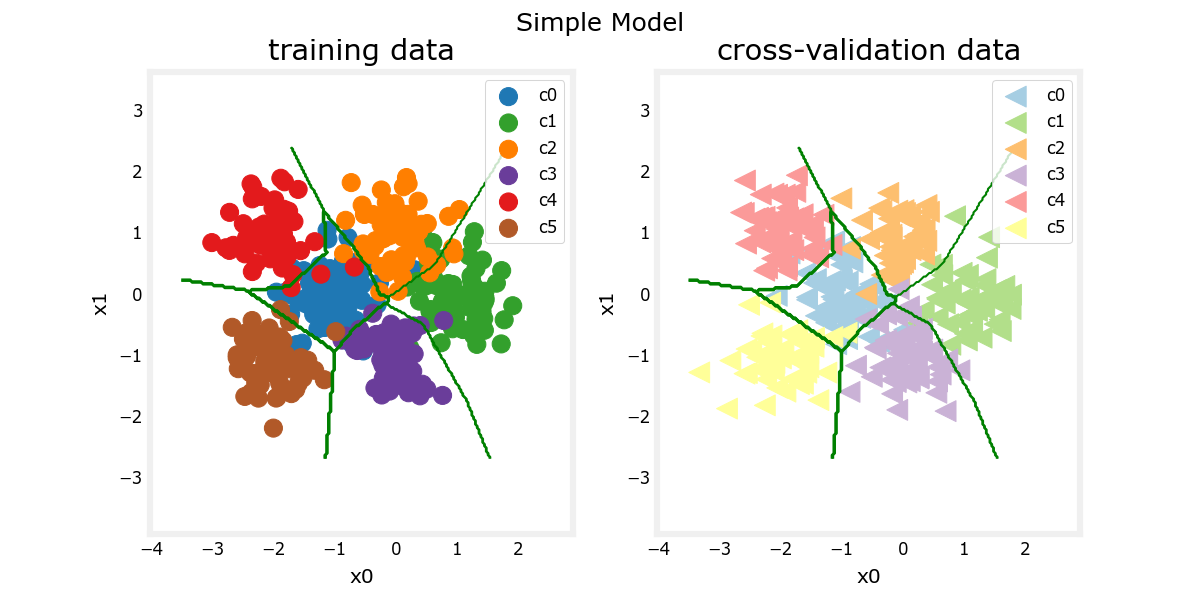

1082/1082 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step


In [56]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Simple Model")

This simple models does pretty well. Let's calculate the classification error.

In [57]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
categorization error, training, simple model, 0.075, complex model: 0.010
categorization error, cv,       simple model, 0.062, complex model: 0.097


Our simple model has a little higher classification error on training data but does better on cross-validation data than the more complex model.

<a name="6"></a>
## 6 - Regularization
As in the case of polynomial regression, one can apply regularization to moderate the impact of a more complex model. Let's try this below.

<a name="ex05"></a>
### Exercise 5

Reconstruct your complex model, but this time include regularization.
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 40 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [58]:
# UNQ_C5
# GRADED CELL: model_r

tf.random.set_seed(1234)
model_r = Sequential(
    [
        ### START CODE HERE ### 
        Dense(units=120,activation=relu,kernel_regularizer=tf.keras.regularizers.l2(0.1),name="L1"),
        Dense(units=40,activation=relu,kernel_regularizer=tf.keras.regularizers.l2(0.1),name="L2"),
        Dense(units=6,activation=linear,name="L3"),
        ### START CODE HERE ### 
    ], name= None
)
model_r.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
    ### START CODE HERE ### 
)


In [59]:
# BEGIN UNIT TEST
model_r.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.7958  
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 1.7652
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 1.3654
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 1.1175
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 1.0210
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 0.9661
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 0.9009
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.8485
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.8099
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 0.7838
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.7695
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.7534
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 0.7369
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 0.7204
Epoch 15/1000
13/13 ━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.4578
Epoch 80/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4572 
Epoch 81/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 0.4564
Epoch 82/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.4559
Epoch 83/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 0.4554
Epoch 84/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.4550
Epoch 85/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 0.4547
Epoch 86/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 0.4550
Epoch 87/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 0.4552
Epoch 88/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 0.4557
Epoch 89/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.4569
Epoch 90/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 0.4584
Epoch 91/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 0.4607
Epoch 92/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 0.4633
Epoch 93/1000
13/13 ━━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 0.4544
Epoch 158/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.4523
Epoch 159/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 0.4502
Epoch 160/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.4482
Epoch 161/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 0.4464
Epoch 162/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 0.4446
Epoch 163/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 0.4428
Epoch 164/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.4412
Epoch 165/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 0.4397
Epoch 166/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 0.4384
Epoch 167/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 0.4371
Epoch 168/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 0.4358
Epoch 169/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 0.4346
Epoch 170/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.4332
Epoch 171/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.3930
Epoch 236/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 0.3928
Epoch 237/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.3925
Epoch 238/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.3923
Epoch 239/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 0.3919
Epoch 240/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 0.3917
Epoch 241/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.3913
Epoch 242/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.3910
Epoch 243/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 0.3908
Epoch 244/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 0.3905
Epoch 245/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 0.3902
Epoch 246/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 0.3900
Epoch 247/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - loss: 0.3897
Epoch 248/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 0.3895
Epoch 249/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.3747
Epoch 314/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 0.3745
Epoch 315/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 0.3743
Epoch 316/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 0.3741
Epoch 317/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.3739
Epoch 318/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.3737
Epoch 319/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 0.3736
Epoch 320/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 0.3734
Epoch 321/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.3732
Epoch 322/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 0.3730
Epoch 323/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 0.3728
Epoch 324/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.3726
Epoch 325/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.3725
Epoch 326/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 0.3723
Epoch 327/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 0.3617
Epoch 392/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 0.3615
Epoch 393/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 0.3613
Epoch 394/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 0.3610
Epoch 395/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 0.3608
Epoch 396/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 0.3605
Epoch 397/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 0.3604
Epoch 398/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.3597
Epoch 399/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 0.3594
Epoch 400/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 0.3589
Epoch 401/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 0.3587
Epoch 402/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 0.3585
Epoch 403/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.3585
Epoch 404/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 0.3585
Epoch 405/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.3508
Epoch 470/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 0.3506
Epoch 471/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 0.3506
Epoch 472/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.3505
Epoch 473/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.3503
Epoch 474/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.3503
Epoch 475/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 0.3502
Epoch 476/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.3500
Epoch 477/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 0.3500
Epoch 478/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.3500
Epoch 479/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.3498
Epoch 480/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 0.3497
Epoch 481/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 0.3497
Epoch 482/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 0.3495
Epoch 483/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.3402
Epoch 548/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3400 
Epoch 549/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 0.3417
Epoch 550/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.3429
Epoch 551/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 0.3436
Epoch 552/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.3463
Epoch 553/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 0.3469
Epoch 554/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 0.3671
Epoch 555/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 0.3575
Epoch 556/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.3508
Epoch 557/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 0.3428
Epoch 558/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 0.3388
Epoch 559/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.3385
Epoch 560/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 0.3398
Epoch 561/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 0.3364
Epoch 626/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 0.3426
Epoch 627/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.3443
Epoch 628/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.3633
Epoch 629/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.3331
Epoch 630/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 0.3446
Epoch 631/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.3352
Epoch 632/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 0.3426
Epoch 633/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.3514
Epoch 634/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 0.3523
Epoch 635/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 0.3525
Epoch 636/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 0.3424
Epoch 637/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 0.3411
Epoch 638/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 0.3428
Epoch 639/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 0.3348
Epoch 704/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3345 
Epoch 705/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 0.3345
Epoch 706/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 0.3344
Epoch 707/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 0.3343
Epoch 708/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 0.3344
Epoch 709/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 0.3345
Epoch 710/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.3345
Epoch 711/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 0.3347
Epoch 712/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - loss: 0.3346
Epoch 713/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.3338
Epoch 714/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 0.3376
Epoch 715/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 0.3393
Epoch 716/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 0.3476
Epoch 717/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 0.3294
Epoch 782/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 0.3263
Epoch 783/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 0.3258
Epoch 784/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.3275
Epoch 785/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 0.3291
Epoch 786/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.3301
Epoch 787/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.3303
Epoch 788/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 0.3303
Epoch 789/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.3302
Epoch 790/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 0.3299
Epoch 791/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.3301
Epoch 792/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.3304
Epoch 793/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.3300
Epoch 794/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 0.3286
Epoch 795/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 0.3277
Epoch 860/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.3180
Epoch 861/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 0.3219
Epoch 862/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.3385
Epoch 863/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 0.3355
Epoch 864/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.3337
Epoch 865/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 0.3277
Epoch 866/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.3240
Epoch 867/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 0.3229
Epoch 868/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 0.3243
Epoch 869/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 0.3253
Epoch 870/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.3266
Epoch 871/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 0.3270
Epoch 872/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3272 
Epoch 873/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.3249
Epoch 938/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.3250
Epoch 939/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.3251
Epoch 940/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.3249
Epoch 941/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 0.3248
Epoch 942/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.3247
Epoch 943/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 0.3251
Epoch 944/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.3252
Epoch 945/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 0.3252
Epoch 946/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 0.3253
Epoch 947/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 0.3253
Epoch 948/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.3254
Epoch 949/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 0.3254
Epoch 950/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 0.3254
Epoch 951/1000
13/13 

In [60]:
# BEGIN UNIT TEST
model_r.summary()

model_r_test(model_r, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 120)                 │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L2 (Dense)                           │ (None, 40)                  │           4,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L3 (Dense)                           │ (None, 6)                   │             246 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,340 (127.66 KB)

 Trainable params: 5,446 (42.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,894 (85.11 KB)

ddd


ValueError: The layer sequential has never been called and thus has no defined input.

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "ComplexRegularized"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model_r = Sequential(
    [
        Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L1"), 
        Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L2"),  
        Dense(classes, activation = 'linear', name="L3")  
    ], name="ComplexRegularized"
)
model_r.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=tf.keras.optimizers.Adam(0.01),                             
)

model_r.fit(
    X_train,y_train,
    epochs=1000
)                                   
``` 

<IPython.core.display.Javascript object>


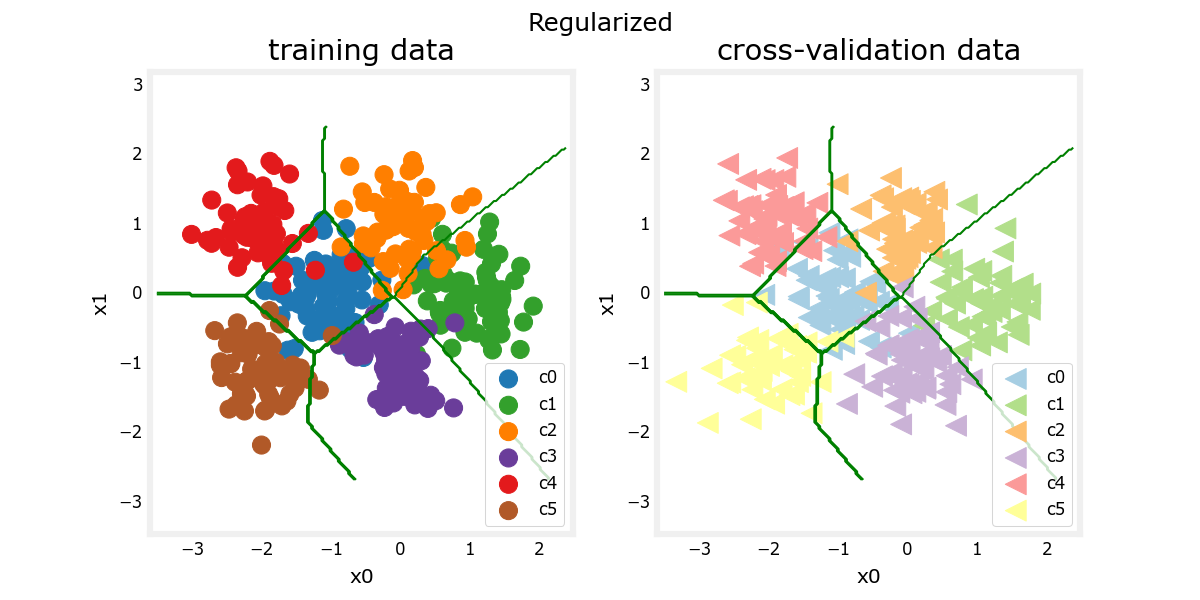

1082/1082 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step


In [61]:
#make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

The results look very similar to the 'ideal' model. Let's check classification error.

In [62]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step
categorization error, training, regularized: 0.075, simple model, 0.075, complex model: 0.010
categorization error, cv,       regularized: 0.069, simple model, 0.062, complex model: 0.097


The simple model is a bit better in the training set than the regularized model but it worse in the cross validation set.

<a name="7"></a>
## 7 - Iterate to find optimal regularization value
As you did in linear regression, you can try many regularization values. This code takes several minutes to run. If you have time, you can run it and check the results. If not, you have completed the graded parts of the assignment!

In [63]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")


Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3385  
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 0.4097
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 0.3138
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 0.2512
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.2225
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.2138
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 0.2114
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 0.2031
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 0.1979
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 0.1960
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.1962
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.1945
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 0.1918
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.1929
Epoch 15/1000
13/13 ━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1294 
Epoch 80/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.1362
Epoch 81/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.1356
Epoch 82/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 0.1271
Epoch 83/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 0.1274
Epoch 84/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 0.1351
Epoch 85/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.1222
Epoch 86/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.1152
Epoch 87/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 0.1392
Epoch 88/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 0.1212
Epoch 89/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 0.1317
Epoch 90/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 0.1296
Epoch 91/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.1200
Epoch 92/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 0.1260
Epoch 93/1000
13/13 ━━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 0.1437
Epoch 158/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 0.0974
Epoch 159/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.0993
Epoch 160/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 0.0808
Epoch 161/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 0.0995
Epoch 162/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 0.0991
Epoch 163/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 0.1204
Epoch 164/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.0952
Epoch 165/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.0974
Epoch 166/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.0976
Epoch 167/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 0.0850
Epoch 168/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 0.0927
Epoch 169/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 0.0871
Epoch 170/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 0.0760
Epoch 171/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.0687
Epoch 236/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.0720
Epoch 237/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.0663
Epoch 238/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.0654
Epoch 239/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 0.0673
Epoch 240/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.0613
Epoch 241/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 0.0627
Epoch 242/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 0.0675
Epoch 243/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 0.0631
Epoch 244/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.0547
Epoch 245/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 0.0635
Epoch 246/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 0.0578
Epoch 247/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 0.0579
Epoch 248/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 0.0674
Epoch 249/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.0638
Epoch 314/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 0.0650
Epoch 315/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 0.0552
Epoch 316/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 0.0634
Epoch 317/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 0.0619
Epoch 318/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.0564
Epoch 319/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 0.0565
Epoch 320/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0633 
Epoch 321/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 0.0698
Epoch 322/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 0.0593
Epoch 323/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 0.0852
Epoch 324/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0650 
Epoch 325/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 0.0617
Epoch 326/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 0.0920
Epoch 327/1000
13/13 ━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 0.0424
Epoch 392/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 0.0406
Epoch 393/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 0.0421
Epoch 394/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.0434
Epoch 395/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 0.0449
Epoch 396/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 0.0430
Epoch 397/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.0395
Epoch 398/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0463 
Epoch 399/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 0.0486
Epoch 400/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 0.0520
Epoch 401/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 0.0503
Epoch 402/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 0.0604
Epoch 403/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 0.0552
Epoch 404/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 0.0765
Epoch 405/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 0.0434
Epoch 470/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0515 
Epoch 471/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 0.0490
Epoch 472/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 0.0541
Epoch 473/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0464 
Epoch 474/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.0510
Epoch 475/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 0.0454
Epoch 476/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.0469
Epoch 477/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 0.0466
Epoch 478/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.0472
Epoch 479/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.0459
Epoch 480/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 0.0396
Epoch 481/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 0.0348
Epoch 482/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.0359
Epoch 483/1000
13/13 ━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 0.0395
Epoch 548/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 0.0435
Epoch 549/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.0426
Epoch 550/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.0490
Epoch 551/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 0.0344
Epoch 552/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 0.0423
Epoch 553/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 0.0389
Epoch 554/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 0.0437
Epoch 555/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.0428
Epoch 556/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0360 
Epoch 557/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 0.0410
Epoch 558/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 0.0329
Epoch 559/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0368 
Epoch 560/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - loss: 0.0331
Epoch 561/1000
13/13 ━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 0.0533
Epoch 626/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0907 
Epoch 627/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 0.0505
Epoch 628/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 0.0691
Epoch 629/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 0.0594
Epoch 630/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 0.0360
Epoch 631/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.0382
Epoch 632/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.0632
Epoch 633/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.0445
Epoch 634/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 0.0529
Epoch 635/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.0441
Epoch 636/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 0.0404
Epoch 637/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 0.0634
Epoch 638/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.0926
Epoch 639/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0260 
Epoch 704/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 0.0261
Epoch 705/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 0.0291
Epoch 706/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 0.0263
Epoch 707/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 0.0311
Epoch 708/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.0262
Epoch 709/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.0251
Epoch 710/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.0256
Epoch 711/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.0251
Epoch 712/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 0.0273
Epoch 713/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 0.0262
Epoch 714/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.0204
Epoch 715/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.0313
Epoch 716/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0248 
Epoch 717/1000
13/13 ━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.0266
Epoch 782/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.0250
Epoch 783/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 0.0261
Epoch 784/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 0.0246
Epoch 785/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 0.0266
Epoch 786/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.0243
Epoch 787/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 0.0216
Epoch 788/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.0201
Epoch 789/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 0.0176
Epoch 790/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 0.0234
Epoch 791/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 0.0218
Epoch 792/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.0267
Epoch 793/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 0.0339
Epoch 794/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.0245
Epoch 795/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.0284
Epoch 860/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0268 
Epoch 861/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 0.0297
Epoch 862/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 0.0259
Epoch 863/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - loss: 0.0259
Epoch 864/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 0.0209
Epoch 865/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 0.0191
Epoch 866/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 0.0183
Epoch 867/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 0.0184
Epoch 868/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.0224
Epoch 869/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.0219
Epoch 870/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 0.0566
Epoch 871/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.0397
Epoch 872/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 0.0428
Epoch 873/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 0.0189
Epoch 938/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 0.0202
Epoch 939/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 0.0202
Epoch 940/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0187 
Epoch 941/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 0.0175
Epoch 942/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 0.0178
Epoch 943/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0181 
Epoch 944/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 0.0220
Epoch 945/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 0.0313
Epoch 946/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.0165
Epoch 947/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0207 
Epoch 948/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 0.0251
Epoch 949/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0269 
Epoch 950/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.0315
Epoch 951/1000
13/13 ━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 0.2554
Epoch 16/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.2492
Epoch 17/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.2498
Epoch 18/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 0.2458
Epoch 19/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 0.2453
Epoch 20/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 0.2454
Epoch 21/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.2432
Epoch 22/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 0.2419
Epoch 23/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 0.2407
Epoch 24/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - loss: 0.2385
Epoch 25/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 0.2360
Epoch 26/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 0.2403
Epoch 27/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 0.2385
Epoch 28/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 0.2346
Epoch 29/1000
13/13 ━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.2012
Epoch 94/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 0.1976
Epoch 95/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 0.2052
Epoch 96/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.1957
Epoch 97/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 0.2048
Epoch 98/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2010 
Epoch 99/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1984 
Epoch 100/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 0.2030
Epoch 101/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 0.1998
Epoch 102/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1979 
Epoch 103/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 0.2016
Epoch 104/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 0.1982
Epoch 105/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1968 
Epoch 106/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.2011
Epoch 107/1000
13/13 ━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.1814
Epoch 172/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 0.1823
Epoch 173/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 0.1819
Epoch 174/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 0.1791
Epoch 175/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 0.1833
Epoch 176/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 0.1809
Epoch 177/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.1801
Epoch 178/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 0.1792
Epoch 179/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 0.1802
Epoch 180/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 0.1775
Epoch 181/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.1830
Epoch 182/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - loss: 0.1788
Epoch 183/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.1783
Epoch 184/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 0.1798
Epoch 185/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 0.1681
Epoch 250/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 0.1689
Epoch 251/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 0.1662
Epoch 252/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.1694
Epoch 253/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 0.1678
Epoch 254/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 0.1702
Epoch 255/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 0.1675
Epoch 256/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.1692
Epoch 257/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 0.1628
Epoch 258/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 0.1682
Epoch 259/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.1674
Epoch 260/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.1655
Epoch 261/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 0.1691
Epoch 262/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.1655
Epoch 263/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.1776
Epoch 328/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.1643
Epoch 329/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.1634
Epoch 330/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.1626
Epoch 331/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 0.1614
Epoch 332/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.1612
Epoch 333/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.1603
Epoch 334/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.1576
Epoch 335/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 0.1629
Epoch 336/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 0.1589
Epoch 337/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 0.1630
Epoch 338/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 0.1609
Epoch 339/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 0.1648
Epoch 340/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.1666
Epoch 341/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.1596
Epoch 406/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.1514
Epoch 407/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 0.1689
Epoch 408/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 0.1529
Epoch 409/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 0.1678
Epoch 410/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.1559
Epoch 411/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 0.1649
Epoch 412/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.1532
Epoch 413/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 0.1603
Epoch 414/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 0.1574
Epoch 415/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 0.1618
Epoch 416/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.1520
Epoch 417/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.1610
Epoch 418/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 0.1514
Epoch 419/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 0.1497
Epoch 484/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 0.1486
Epoch 485/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.1522
Epoch 486/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.1515
Epoch 487/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 0.1568
Epoch 488/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 0.1492
Epoch 489/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 0.1514
Epoch 490/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 0.1538
Epoch 491/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 0.1517
Epoch 492/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.1517
Epoch 493/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.1483
Epoch 494/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 0.1477
Epoch 495/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 0.1510
Epoch 496/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 0.1462
Epoch 497/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.1467
Epoch 562/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.1465
Epoch 563/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 0.1446
Epoch 564/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 0.1439
Epoch 565/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 0.1434
Epoch 566/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 0.1402
Epoch 567/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 0.1469
Epoch 568/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.1405
Epoch 569/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.1459
Epoch 570/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.1449
Epoch 571/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 0.1435
Epoch 572/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.1509
Epoch 573/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 0.1408
Epoch 574/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 0.1453
Epoch 575/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 0.1380
Epoch 640/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1423 
Epoch 641/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1383 
Epoch 642/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 0.1480
Epoch 643/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 0.1376
Epoch 644/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 0.1433
Epoch 645/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 0.1424
Epoch 646/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 0.1404
Epoch 647/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 0.1476
Epoch 648/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 0.1393
Epoch 649/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 0.1387
Epoch 650/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 0.1406
Epoch 651/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 0.1410
Epoch 652/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 0.1407
Epoch 653/1000
13/13 ━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.1483
Epoch 718/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.1384
Epoch 719/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 0.1398
Epoch 720/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.1422
Epoch 721/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.1399
Epoch 722/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.1446
Epoch 723/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 0.1391
Epoch 724/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.1437
Epoch 725/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.1441
Epoch 726/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.1394
Epoch 727/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 0.1424
Epoch 728/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 0.1390
Epoch 729/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 0.1389
Epoch 730/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 0.1396
Epoch 731/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 0.1322
Epoch 796/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.1282
Epoch 797/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.1289
Epoch 798/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 0.1298
Epoch 799/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 0.1302
Epoch 800/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.1295
Epoch 801/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.1286
Epoch 802/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 0.1274
Epoch 803/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 0.1314
Epoch 804/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 0.1332
Epoch 805/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 0.1300
Epoch 806/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.1294
Epoch 807/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 0.1265
Epoch 808/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 0.1330
Epoch 809/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.1396
Epoch 874/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 0.1275
Epoch 875/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.1323
Epoch 876/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 0.1291
Epoch 877/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 0.1318
Epoch 878/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 0.1281
Epoch 879/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.1286
Epoch 880/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 0.1266
Epoch 881/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.1255
Epoch 882/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 0.1285
Epoch 883/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.1230
Epoch 884/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 0.1258
Epoch 885/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.1290
Epoch 886/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 0.1273
Epoch 887/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.1248
Epoch 952/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 0.1285
Epoch 953/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.1302
Epoch 954/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 0.1324
Epoch 955/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.1539
Epoch 956/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 0.1415
Epoch 957/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1574 
Epoch 958/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 0.1309
Epoch 959/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 0.1459
Epoch 960/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.1358
Epoch 961/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.1434
Epoch 962/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 0.1389
Epoch 963/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.1415
Epoch 964/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 0.1287
Epoch 965/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.3519
Epoch 30/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 0.3479
Epoch 31/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.3454
Epoch 32/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 0.3425
Epoch 33/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 0.3421
Epoch 34/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 0.3392
Epoch 35/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 0.3386
Epoch 36/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.3370
Epoch 37/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 0.3345
Epoch 38/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.3350
Epoch 39/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 0.3319
Epoch 40/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 0.3318
Epoch 41/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 0.3301
Epoch 42/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 0.3272
Epoch 43/1000
13/13 ━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 0.2803
Epoch 108/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 0.2820
Epoch 109/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.2801
Epoch 110/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 0.2812
Epoch 111/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.2779
Epoch 112/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 0.2787
Epoch 113/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.2763
Epoch 114/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.2764
Epoch 115/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 0.2760
Epoch 116/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.2740
Epoch 117/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 0.2761
Epoch 118/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.2734
Epoch 119/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 0.2729
Epoch 120/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.2738
Epoch 121/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2577 
Epoch 186/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2581 
Epoch 187/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 0.2584
Epoch 188/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - loss: 0.2573
Epoch 189/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 0.2578
Epoch 190/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2574 
Epoch 191/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2579 
Epoch 192/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.2564
Epoch 193/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.2586
Epoch 194/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 0.2564
Epoch 195/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 0.2551
Epoch 196/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 0.2562
Epoch 197/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.2567
Epoch 198/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.2565
Epoch 199/1000
13/13 ━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - loss: 0.2465
Epoch 264/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.2461
Epoch 265/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.2459
Epoch 266/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.2447
Epoch 267/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - loss: 0.2463
Epoch 268/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.2440
Epoch 269/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.2450
Epoch 270/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2445 
Epoch 271/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.2458
Epoch 272/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 0.2435
Epoch 273/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 0.2456
Epoch 274/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.2437
Epoch 275/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 0.2436
Epoch 276/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 0.2439
Epoch 277/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.2370
Epoch 342/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 0.2395
Epoch 343/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 0.2355
Epoch 344/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 0.2372
Epoch 345/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 0.2374
Epoch 346/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.2361
Epoch 347/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.2360
Epoch 348/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.2362
Epoch 349/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 0.2363
Epoch 350/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 0.2360
Epoch 351/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 0.2367
Epoch 352/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.2346
Epoch 353/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 0.2365
Epoch 354/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 0.2347
Epoch 355/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.2317
Epoch 420/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 0.2301
Epoch 421/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 0.2286
Epoch 422/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 0.2310
Epoch 423/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.2294
Epoch 424/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.2296
Epoch 425/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 0.2285
Epoch 426/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 0.2309
Epoch 427/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 0.2309
Epoch 428/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.2290
Epoch 429/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 0.2284
Epoch 430/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.2306
Epoch 431/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.2291
Epoch 432/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.2298
Epoch 433/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 0.2274
Epoch 498/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 0.2264
Epoch 499/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.2270
Epoch 500/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 0.2255
Epoch 501/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 0.2237
Epoch 502/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.2265
Epoch 503/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 0.2247
Epoch 504/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.2245
Epoch 505/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 0.2249
Epoch 506/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.2249
Epoch 507/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 0.2235
Epoch 508/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 0.2254
Epoch 509/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.2236
Epoch 510/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 0.2245
Epoch 511/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 0.2210
Epoch 576/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.2214
Epoch 577/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.2191
Epoch 578/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.2216
Epoch 579/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.2219
Epoch 580/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 0.2192
Epoch 581/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 0.2202
Epoch 582/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 0.2223
Epoch 583/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 0.2199
Epoch 584/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.2209
Epoch 585/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.2192
Epoch 586/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.2216
Epoch 587/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 0.2206
Epoch 588/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 0.2199
Epoch 589/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.2161
Epoch 654/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.2175
Epoch 655/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.2161
Epoch 656/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 0.2195
Epoch 657/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.2160
Epoch 658/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.2177
Epoch 659/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.2166
Epoch 660/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 0.2181
Epoch 661/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 0.2171
Epoch 662/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.2168
Epoch 663/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.2173
Epoch 664/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 0.2171
Epoch 665/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.2161
Epoch 666/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.2170
Epoch 667/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.2151
Epoch 732/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 0.2149
Epoch 733/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 0.2154
Epoch 734/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 0.2150
Epoch 735/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 0.2149
Epoch 736/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.2143
Epoch 737/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.2170
Epoch 738/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 0.2130
Epoch 739/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.2159
Epoch 740/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 0.2142
Epoch 741/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.2160
Epoch 742/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.2132
Epoch 743/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 0.2146
Epoch 744/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.2155
Epoch 745/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 0.2163
Epoch 810/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 0.2123
Epoch 811/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 0.2154
Epoch 812/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 0.2131
Epoch 813/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.2138
Epoch 814/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 0.2140
Epoch 815/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 0.2161
Epoch 816/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.2111
Epoch 817/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.2154
Epoch 818/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.2125
Epoch 819/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.2126
Epoch 820/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 0.2150
Epoch 821/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.2115
Epoch 822/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.2135
Epoch 823/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 0.2116
Epoch 888/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 0.2111
Epoch 889/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 0.2157
Epoch 890/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.2102
Epoch 891/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 0.2139
Epoch 892/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.2115
Epoch 893/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.2112
Epoch 894/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 0.2111
Epoch 895/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 0.2154
Epoch 896/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 0.2104
Epoch 897/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.2127
Epoch 898/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.2118
Epoch 899/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.2112
Epoch 900/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 0.2112
Epoch 901/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.2101
Epoch 966/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 0.2106
Epoch 967/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.2108
Epoch 968/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 0.2115
Epoch 969/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 0.2123
Epoch 970/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.2090
Epoch 971/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 0.2112
Epoch 972/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 0.2093
Epoch 973/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.2108
Epoch 974/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.2130
Epoch 975/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.2087
Epoch 976/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 0.2120
Epoch 977/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2096 
Epoch 978/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 0.2116
Epoch 979/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 0.4222
Epoch 44/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 0.4208
Epoch 45/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.4181
Epoch 46/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 0.4164
Epoch 47/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 0.4143
Epoch 48/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.4133
Epoch 49/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.4111
Epoch 50/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 0.4105
Epoch 51/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.4091
Epoch 52/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.4084
Epoch 53/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 0.4084
Epoch 54/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 0.4081
Epoch 55/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.4084
Epoch 56/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.4096
Epoch 57/1000
13/13 ━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 0.3899
Epoch 122/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.3904
Epoch 123/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.3901
Epoch 124/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 0.3893
Epoch 125/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.3884
Epoch 126/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 0.3875
Epoch 127/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 0.3860
Epoch 128/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 0.3848
Epoch 129/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 0.3841
Epoch 130/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 0.3831
Epoch 131/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 0.3820
Epoch 132/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.3801
Epoch 133/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.3798
Epoch 134/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 0.3786
Epoch 135/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.3386
Epoch 200/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.3379
Epoch 201/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3373 
Epoch 202/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 0.3376
Epoch 203/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3370 
Epoch 204/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 0.3362
Epoch 205/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 0.3359
Epoch 206/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 0.3355
Epoch 207/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 0.3355
Epoch 208/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.3350
Epoch 209/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.3343
Epoch 210/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 0.3338
Epoch 211/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.3341
Epoch 212/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.3335
Epoch 213/1000
13/13 ━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.3168
Epoch 278/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 0.3163
Epoch 279/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 0.3166
Epoch 280/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.3164
Epoch 281/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.3162
Epoch 282/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 0.3155
Epoch 283/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 0.3156
Epoch 284/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.3160
Epoch 285/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.3155
Epoch 286/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 0.3148
Epoch 287/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 0.3148
Epoch 288/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.3143
Epoch 289/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.3143
Epoch 290/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 0.3138
Epoch 291/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.3050
Epoch 356/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.3050
Epoch 357/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.3046
Epoch 358/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.3048
Epoch 359/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 0.3046
Epoch 360/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.3043
Epoch 361/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.3044
Epoch 362/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.3043
Epoch 363/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.3035
Epoch 364/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 0.3040
Epoch 365/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.3043
Epoch 366/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 0.3040
Epoch 367/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.3036
Epoch 368/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 0.3028
Epoch 369/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.2964
Epoch 434/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 0.2963
Epoch 435/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.2974
Epoch 436/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 0.2969
Epoch 437/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 0.2969
Epoch 438/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 0.2960
Epoch 439/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.2962
Epoch 440/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.2961
Epoch 441/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2962 
Epoch 442/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 0.2955
Epoch 443/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.2961
Epoch 444/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 0.2966
Epoch 445/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 0.2957
Epoch 446/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 0.2961
Epoch 447/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 0.2907
Epoch 512/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.2906
Epoch 513/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.2900
Epoch 514/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.2900
Epoch 515/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.2909
Epoch 516/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.2910
Epoch 517/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 0.2902
Epoch 518/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 0.2901
Epoch 519/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.2903
Epoch 520/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 0.2907
Epoch 521/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.2895
Epoch 522/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 0.2910
Epoch 523/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.2905
Epoch 524/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.2896
Epoch 525/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 0.2874
Epoch 590/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.2854
Epoch 591/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.2861
Epoch 592/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.2848
Epoch 593/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.2857
Epoch 594/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.2845
Epoch 595/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.2847
Epoch 596/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.2853
Epoch 597/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 0.2851
Epoch 598/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 0.2860
Epoch 599/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.2844
Epoch 600/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 0.2847
Epoch 601/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 0.2841
Epoch 602/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 0.2973
Epoch 603/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 0.2810
Epoch 668/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 0.2810
Epoch 669/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 0.2807
Epoch 670/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.2805
Epoch 671/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.2812
Epoch 672/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 0.2811
Epoch 673/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 0.2800
Epoch 674/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.2809
Epoch 675/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.2800
Epoch 676/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.2810
Epoch 677/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 0.2799
Epoch 678/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 0.2805
Epoch 679/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 0.2818
Epoch 680/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.2804
Epoch 681/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 0.2777
Epoch 746/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.2764
Epoch 747/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.2786
Epoch 748/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.2762
Epoch 749/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 0.2772
Epoch 750/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2766 
Epoch 751/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 0.2769
Epoch 752/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 0.2789
Epoch 753/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 0.2823
Epoch 754/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 0.2800
Epoch 755/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.2782
Epoch 756/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 0.2760
Epoch 757/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 0.2759
Epoch 758/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.2762
Epoch 759/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.2732
Epoch 824/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.2747
Epoch 825/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 0.2749
Epoch 826/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 0.2743
Epoch 827/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.2735
Epoch 828/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.2754
Epoch 829/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.2838
Epoch 830/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.2936
Epoch 831/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 0.2880
Epoch 832/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 0.2792
Epoch 833/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.2798
Epoch 834/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 0.2741
Epoch 835/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 0.2732
Epoch 836/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.2886
Epoch 837/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.2754
Epoch 902/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2711 
Epoch 903/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 0.2716
Epoch 904/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 0.2691
Epoch 905/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 0.2729
Epoch 906/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.2696
Epoch 907/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.2716
Epoch 908/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.2707
Epoch 909/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.2718
Epoch 910/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.2706
Epoch 911/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.2709
Epoch 912/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.2693
Epoch 913/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.2716
Epoch 914/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.2708
Epoch 915/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.2679
Epoch 980/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.2676
Epoch 981/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 0.2781
Epoch 982/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.2760
Epoch 983/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.2725
Epoch 984/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.2688
Epoch 985/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.2676
Epoch 986/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 0.2659
Epoch 987/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.2677
Epoch 988/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 0.2686
Epoch 989/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.2688
Epoch 990/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.2677
Epoch 991/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 0.2672
Epoch 992/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 0.2672
Epoch 993/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 0.4854
Epoch 58/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 0.4836
Epoch 59/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 0.4812
Epoch 60/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.4793
Epoch 61/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.4778
Epoch 62/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.4755
Epoch 63/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 0.4741
Epoch 64/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.4722
Epoch 65/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.4705
Epoch 66/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.4687
Epoch 67/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.4671
Epoch 68/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.4652
Epoch 69/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.4638
Epoch 70/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.4620
Epoch 71/1000
13/13 ━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 0.4455
Epoch 136/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 0.4448
Epoch 137/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.4442
Epoch 138/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.4436
Epoch 139/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.4429
Epoch 140/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - loss: 0.4426
Epoch 141/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.4414
Epoch 142/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.4403
Epoch 143/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.4396
Epoch 144/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.4392
Epoch 145/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 0.4387
Epoch 146/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.4379
Epoch 147/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 0.4376
Epoch 148/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.4381
Epoch 149/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.4043
Epoch 214/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.4035
Epoch 215/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 0.4042
Epoch 216/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.4027
Epoch 217/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 0.4029
Epoch 218/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.4007
Epoch 219/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 0.4016
Epoch 220/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 0.4012
Epoch 221/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 0.4020
Epoch 222/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.4002
Epoch 223/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 0.4008
Epoch 224/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.3991
Epoch 225/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.3999
Epoch 226/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 0.3985
Epoch 227/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 0.3805
Epoch 292/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 0.3804
Epoch 293/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 0.3806
Epoch 294/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 0.3802
Epoch 295/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 0.3793
Epoch 296/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 0.3790
Epoch 297/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3794 
Epoch 298/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3794 
Epoch 299/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 0.3789
Epoch 300/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3791 
Epoch 301/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 0.3782
Epoch 302/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 0.3783
Epoch 303/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 0.3783
Epoch 304/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 0.3782
Epoch 305/1000
13/13 ━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.3629
Epoch 370/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 0.3622
Epoch 371/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.3621
Epoch 372/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 0.3618
Epoch 373/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 0.3617
Epoch 374/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.3619
Epoch 375/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 0.3611
Epoch 376/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.3611
Epoch 377/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 0.3613
Epoch 378/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3603 
Epoch 379/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3604 
Epoch 380/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 0.3597
Epoch 381/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 0.3596
Epoch 382/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 0.3592
Epoch 383/1000
13/13 ━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3475 
Epoch 448/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 0.3474
Epoch 449/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 0.3471
Epoch 450/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 0.3470
Epoch 451/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 0.3468
Epoch 452/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 0.3476
Epoch 453/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.3467
Epoch 454/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 0.3465
Epoch 455/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 0.3466
Epoch 456/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 0.3469
Epoch 457/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.3462
Epoch 458/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 0.3463
Epoch 459/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 0.3466
Epoch 460/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.3459
Epoch 461/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 0.3388
Epoch 526/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 0.3390
Epoch 527/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.3387
Epoch 528/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 0.3390
Epoch 529/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.3392
Epoch 530/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 0.3384
Epoch 531/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3385 
Epoch 532/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 0.3380
Epoch 533/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3380 
Epoch 534/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 0.3377
Epoch 535/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 0.3382
Epoch 536/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 0.3380
Epoch 537/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 0.3375
Epoch 538/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 0.3376
Epoch 539/1000
13/13 ━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.3308
Epoch 604/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.3314
Epoch 605/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.3319
Epoch 606/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3317 
Epoch 607/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.3320
Epoch 608/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 0.3310
Epoch 609/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 0.3312
Epoch 610/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 0.3307
Epoch 611/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 0.3370
Epoch 612/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.3310
Epoch 613/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 0.3397
Epoch 614/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 0.3408
Epoch 615/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 0.3392
Epoch 616/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.3343
Epoch 617/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.3266
Epoch 682/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.3264
Epoch 683/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 0.3261
Epoch 684/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 0.3258
Epoch 685/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 0.3189
Epoch 686/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.3336
Epoch 687/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 0.3242
Epoch 688/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3388 
Epoch 689/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 0.3336
Epoch 690/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 0.3396
Epoch 691/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 0.3403
Epoch 692/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.3368
Epoch 693/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 0.3343
Epoch 694/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.3272
Epoch 695/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3216 
Epoch 760/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3204 
Epoch 761/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3252 
Epoch 762/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 0.3269
Epoch 763/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.3253
Epoch 764/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.3219
Epoch 765/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 0.3250
Epoch 766/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.3307
Epoch 767/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.3320
Epoch 768/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.3262
Epoch 769/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.3236
Epoch 770/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.3201
Epoch 771/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 0.3180
Epoch 772/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 0.3174
Epoch 773/1000
13/13 ━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 0.3075
Epoch 838/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3261 
Epoch 839/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 0.3261
Epoch 840/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 0.3254
Epoch 841/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 0.3216
Epoch 842/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 0.3182
Epoch 843/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.3146
Epoch 844/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.3132
Epoch 845/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 0.3121
Epoch 846/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 0.3198
Epoch 847/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 0.3218
Epoch 848/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.3167
Epoch 849/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.3192
Epoch 850/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 0.3221
Epoch 851/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 0.3184
Epoch 916/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 0.3114
Epoch 917/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 0.3150
Epoch 918/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.3130
Epoch 919/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 0.3227
Epoch 920/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 0.3230
Epoch 921/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 0.3248
Epoch 922/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 0.3115
Epoch 923/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.3149
Epoch 924/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 0.3172
Epoch 925/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 0.3168
Epoch 926/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 0.3189
Epoch 927/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 0.3166
Epoch 928/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.3138
Epoch 929/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 0.3075
Epoch 994/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 0.3082
Epoch 995/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 0.3083
Epoch 996/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 0.3082
Epoch 997/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 0.3085
Epoch 998/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 0.3013
Epoch 999/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 0.3103
Epoch 1000/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 0.3114
Finished lambda = 0.1
Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - loss: 9.9044 
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 2.1582
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 1.7892
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 1.4119
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 1.2481
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 1.1729
Epoch 7/1

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.5784
Epoch 72/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 0.5763
Epoch 73/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 0.5742
Epoch 74/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 0.5722
Epoch 75/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5702 
Epoch 76/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.5682
Epoch 77/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 91us/step - loss: 0.5663
Epoch 78/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 0.5644
Epoch 79/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5626 
Epoch 80/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 0.5607
Epoch 81/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 0.5589
Epoch 82/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 0.5572
Epoch 83/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 0.5554
Epoch 84/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 0.5537
Epoch 85/1000
13/13 ━━━━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - loss: 0.4798
Epoch 150/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 0.4790
Epoch 151/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 0.4783
Epoch 152/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 0.4775
Epoch 153/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.4768
Epoch 154/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 0.4760
Epoch 155/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.4753
Epoch 156/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.4746
Epoch 157/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 0.4739
Epoch 158/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.4732
Epoch 159/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.4725
Epoch 160/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.4718
Epoch 161/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.4711
Epoch 162/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 0.4705
Epoch 163/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 0.4520
Epoch 228/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 0.4529
Epoch 229/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 0.4540
Epoch 230/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 0.4552
Epoch 231/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.4567
Epoch 232/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 0.4584
Epoch 233/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.4604
Epoch 234/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 0.4628
Epoch 235/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.4654
Epoch 236/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 0.4686
Epoch 237/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 0.4722
Epoch 238/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.4764
Epoch 239/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 0.4813
Epoch 240/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.4869
Epoch 241/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 0.4570
Epoch 306/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 0.4565
Epoch 307/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.4560
Epoch 308/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 0.4556
Epoch 309/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 0.4552
Epoch 310/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.4548
Epoch 311/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 0.4544
Epoch 312/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 0.4540
Epoch 313/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.4536
Epoch 314/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 0.4531
Epoch 315/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.4527
Epoch 316/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 0.4523
Epoch 317/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 0.4520
Epoch 318/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 0.4516
Epoch 319/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 0.4338
Epoch 384/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.4336
Epoch 385/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 0.4334
Epoch 386/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.4332
Epoch 387/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 0.4330
Epoch 388/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 0.4327
Epoch 389/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 0.4326
Epoch 390/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.4324
Epoch 391/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 0.4321
Epoch 392/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.4320
Epoch 393/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - loss: 0.4318
Epoch 394/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 0.4315
Epoch 395/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 0.4314
Epoch 396/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.4312
Epoch 397/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.4199
Epoch 462/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.4197
Epoch 463/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.4196
Epoch 464/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.4195
Epoch 465/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 0.4193
Epoch 466/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.4191
Epoch 467/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 0.4191
Epoch 468/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 0.4188
Epoch 469/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 0.4187
Epoch 470/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 0.4185
Epoch 471/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.4184
Epoch 472/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.4182
Epoch 473/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.4181
Epoch 474/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.4180
Epoch 475/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 0.4097
Epoch 540/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 0.4097
Epoch 541/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.4094
Epoch 542/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.4093
Epoch 543/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 0.4075
Epoch 544/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.4205
Epoch 545/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 0.4002
Epoch 546/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 0.4005
Epoch 547/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.4056
Epoch 548/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 0.4085
Epoch 549/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 0.4123
Epoch 550/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.4132
Epoch 551/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.4136
Epoch 552/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.4131
Epoch 553/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 0.4073
Epoch 618/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 0.4114
Epoch 619/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.4021
Epoch 620/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.3868
Epoch 621/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 0.3981
Epoch 622/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3983 
Epoch 623/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 0.4068
Epoch 624/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.4066
Epoch 625/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 0.4162
Epoch 626/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.4002
Epoch 627/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.3859
Epoch 628/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 0.4020
Epoch 629/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4068 
Epoch 630/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 0.3967
Epoch 631/1000
13/13 ━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 0.3821
Epoch 696/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 0.3838
Epoch 697/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3885 
Epoch 698/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 0.3925
Epoch 699/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.3970
Epoch 700/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.3988
Epoch 701/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.3996
Epoch 702/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.3993
Epoch 703/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.3987
Epoch 704/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.4001
Epoch 705/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 0.3925
Epoch 706/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 0.3906
Epoch 707/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 0.3928
Epoch 708/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.3932
Epoch 709/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 0.3794
Epoch 774/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.3875
Epoch 775/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.3869
Epoch 776/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 0.3958
Epoch 777/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.3922
Epoch 778/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.3924
Epoch 779/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.3927
Epoch 780/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 0.3920
Epoch 781/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.3914
Epoch 782/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.3905
Epoch 783/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.3897
Epoch 784/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 0.3889
Epoch 785/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.3882
Epoch 786/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.3878
Epoch 787/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 0.3825
Epoch 852/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 0.3826
Epoch 853/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.3825
Epoch 854/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3825 
Epoch 855/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.3824
Epoch 856/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.3823
Epoch 857/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 0.3822
Epoch 858/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 0.3821
Epoch 859/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.3821
Epoch 860/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.3820
Epoch 861/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 0.3818
Epoch 862/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 0.3818
Epoch 863/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 0.3816
Epoch 864/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 0.3816
Epoch 865/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 0.3783
Epoch 930/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.3796
Epoch 931/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 0.3799
Epoch 932/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 0.3799
Epoch 933/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.3792
Epoch 934/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 0.3788
Epoch 935/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.3784
Epoch 936/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 0.3779
Epoch 937/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 0.3776
Epoch 938/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.3771
Epoch 939/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.3769
Epoch 940/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.3780
Epoch 941/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.3769
Epoch 942/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 0.3765
Epoch 943/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 1.4105
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 1.3377
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 1.2653
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 1.2186
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 1.1754
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 1.1419
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 1.1133
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 1.0873
Epoch 15/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 1.0657
Epoch 16/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 1.0464
Epoch 17/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 1.0296
Epoch 18/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 1.0139
Epoch 19/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.9987
Epoch 20/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.9841
Epoch 21/1000
13/13 ━━━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.6562
Epoch 86/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 0.6542
Epoch 87/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 0.6522
Epoch 88/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6503 
Epoch 89/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 0.6484
Epoch 90/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 0.6466
Epoch 91/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.6448
Epoch 92/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 0.6429
Epoch 93/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.6412
Epoch 94/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 0.6394
Epoch 95/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 0.6378
Epoch 96/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.6360
Epoch 97/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 0.6344
Epoch 98/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6327 
Epoch 99/1000
13/13 ━━━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.5580
Epoch 164/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 0.5572
Epoch 165/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5564 
Epoch 166/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.5556
Epoch 167/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.5547
Epoch 168/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 0.5540
Epoch 169/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 0.5531
Epoch 170/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5524 
Epoch 171/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.5516
Epoch 172/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.5508
Epoch 173/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.5500
Epoch 174/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 0.5493
Epoch 175/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5485 
Epoch 176/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 0.5478
Epoch 177/1000
13/13 ━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 0.5082
Epoch 242/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 0.5078
Epoch 243/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.5073
Epoch 244/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 0.5068
Epoch 245/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.5063
Epoch 246/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.5058
Epoch 247/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.5053
Epoch 248/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5048 
Epoch 249/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 0.5043
Epoch 250/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.5039
Epoch 251/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.5034
Epoch 252/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.5029
Epoch 253/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 0.5024
Epoch 254/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 0.5020
Epoch 255/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 0.4758
Epoch 320/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 0.4754
Epoch 321/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.4751
Epoch 322/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.4747
Epoch 323/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 0.4744
Epoch 324/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.4740
Epoch 325/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.4737
Epoch 326/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 0.4734
Epoch 327/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 0.4730
Epoch 328/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.4727
Epoch 329/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 0.4724
Epoch 330/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.4721
Epoch 331/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 0.4717
Epoch 332/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4714 
Epoch 333/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 0.4535
Epoch 398/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 0.4532
Epoch 399/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 0.4530
Epoch 400/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.4528
Epoch 401/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 0.4528
Epoch 402/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.4524
Epoch 403/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - loss: 0.4521
Epoch 404/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.4518
Epoch 405/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 0.4516
Epoch 406/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.4514
Epoch 407/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 0.4511
Epoch 408/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4509 
Epoch 409/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 0.4507
Epoch 410/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4504 
Epoch 411/1000
13/13 ━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.4374
Epoch 476/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4372 
Epoch 477/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 0.4370
Epoch 478/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.4368
Epoch 479/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 0.4367
Epoch 480/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 0.4364
Epoch 481/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 0.4363
Epoch 482/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.4361
Epoch 483/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.4360
Epoch 484/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4358 
Epoch 485/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 0.4356
Epoch 486/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.4354
Epoch 487/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 0.4353
Epoch 488/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 0.4412
Epoch 489/1000
13/13 ━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 0.4250
Epoch 554/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.4247
Epoch 555/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 0.4246
Epoch 556/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 0.4245
Epoch 557/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.4243
Epoch 558/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.4242
Epoch 559/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.4240
Epoch 560/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 0.4238
Epoch 561/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4237 
Epoch 562/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 0.4235
Epoch 563/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 0.4234
Epoch 564/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 0.4233
Epoch 565/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4231 
Epoch 566/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 0.4256
Epoch 567/1000
13/13 ━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.4310
Epoch 632/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.4139
Epoch 633/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 0.4181
Epoch 634/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 0.4187
Epoch 635/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.4167
Epoch 636/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 0.4174
Epoch 637/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.4172
Epoch 638/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.4170
Epoch 639/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.4170
Epoch 640/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.4168
Epoch 641/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 0.4167
Epoch 642/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4166 
Epoch 643/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.4187
Epoch 644/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.4324
Epoch 645/1000
13/13 ━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 0.4183
Epoch 710/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 0.4248
Epoch 711/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 0.4461
Epoch 712/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 0.4479
Epoch 713/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.4152
Epoch 714/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 0.4293
Epoch 715/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 0.4108
Epoch 716/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.4113
Epoch 717/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 0.4159
Epoch 718/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.4149
Epoch 719/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.4155
Epoch 720/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.4162
Epoch 721/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.4167
Epoch 722/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.4173
Epoch 723/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.5564
Epoch 788/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 0.5596
Epoch 789/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5547 
Epoch 790/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 0.5408
Epoch 791/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.5226
Epoch 792/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.5062
Epoch 793/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 0.4940
Epoch 794/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 0.4852
Epoch 795/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 0.4794
Epoch 796/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4755 
Epoch 797/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 0.4446
Epoch 798/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 0.4293
Epoch 799/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 0.4462
Epoch 800/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.4777
Epoch 801/1000
13/13 ━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 0.4509
Epoch 866/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.4551
Epoch 867/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.4892
Epoch 868/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 0.4631
Epoch 869/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.4584
Epoch 870/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.4591
Epoch 871/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 0.4581
Epoch 872/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 0.4575
Epoch 873/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 0.4555
Epoch 874/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 0.4538
Epoch 875/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.4521
Epoch 876/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 0.4510
Epoch 877/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.4502
Epoch 878/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 0.4502
Epoch 879/1000
13/13 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 0.4422
Epoch 944/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 0.4422
Epoch 945/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.4419
Epoch 946/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 0.4419
Epoch 947/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 0.4417
Epoch 948/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 0.4417
Epoch 949/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.4414
Epoch 950/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.4415
Epoch 951/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 0.4412
Epoch 952/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4413 
Epoch 953/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 0.4410
Epoch 954/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 0.4410
Epoch 955/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4408 
Epoch 956/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 0.4408
Epoch 957/1000
13/13 ━━

<IPython.core.display.Javascript object>


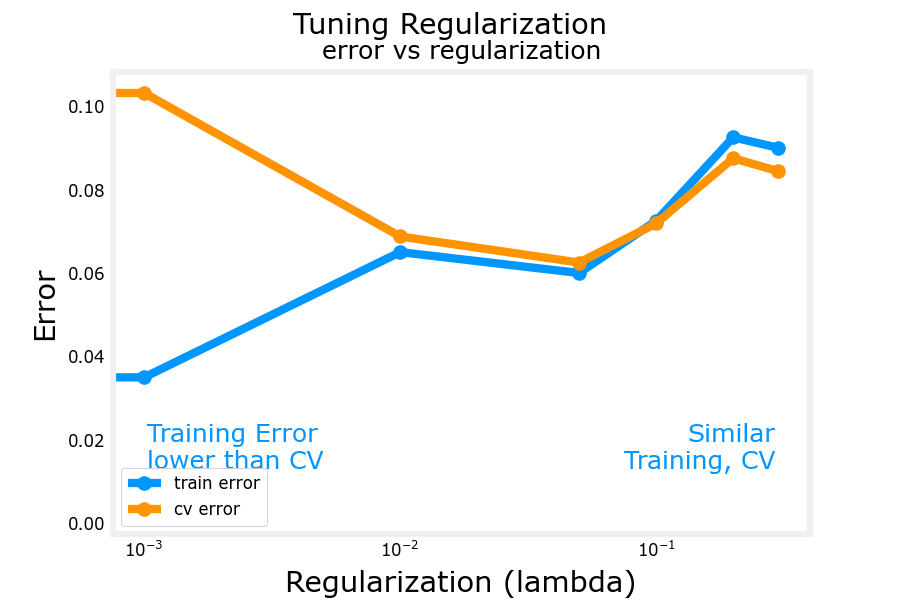

In [65]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

As regularization is increased, the performance of the model on the training and cross-validation data sets converge. For this data set and model, lambda > 0.01 seems to be a reasonable choice.

<a name="7.1"></a>
### 7.1 Test
Let's try our optimized models on the test set and compare them to 'ideal' performance. 

In [ ]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)

Our test set is small and seems to have a number of outliers so classification error is high. However, the performance of our optimized models is comparable to ideal performance.

## Congratulations! 
You have become familiar with important tools to apply when evaluating your machine learning models. Namely:  
* splitting data into trained and untrained sets allows you to differentiate between underfitting and overfitting
* creating three data sets, Training, Cross-Validation and Test allows you to
    * train your parameters $W,B$ with the training set
    * tune model parameters such as complexity, regularization and number of examples with the cross-validation set
    * evaluate your 'real world' performance using the test set.
* comparing training vs cross-validation performance provides insight into a model's propensity towards overfitting (high variance) or underfitting (high bias)